In [1]:
import numpy as np
import matplotlib.pyplot as plt

### helper functions

In [2]:
def normalise(v):
    return v/np.linalg.norm(v.flatten())

def vec(*args):
    return np.array(args).reshape(len(args), 1)

def proj(P, x):
    return np.dot(P, x)

def proj_basis(A, x):
    p = np.zeros(x.shape).flatten()
    num_cols = A.shape[1]
    for j in range(num_cols):
        p += np.dot(A[:, j], x.flatten())*A[:, j]
    return p
        
def draw_vector(ax, direction, position, color):
    vec1 = np.vstack((position.flatten(), position.flatten()+3.0*direction.flatten()))
    plt.plot(vec1[:, 0], vec1[:, 1], color=color, linewidth=2)
    
def draw_point(ax, point, color=[0, 0, 0]):
    ax.scatter(point[0], point[1], 40, color)
    
def matrix_from_basis_vectors(*args):
    return np.hstack(args)


if $u$ is a unit vector then any point $x$ projected by $P = uu^{T}$ will be a on its the line defined by $u$. 

In [3]:
u = normalise(vec(1., 1.))
P = np.dot(u, np.transpose(u))
proj(P, vec(6, 3))

array([[4.5],
       [4.5]])


If $u_1, ..., u_k$ is an orthonormal basis vectors arranged as columns in matrix $A = [u_1, ..., u_k]$ then the projection is given by $P_A = AA^{T}$. Which in the case when $A$ is square and orthonormal $AA^{T} = A^{T}A = I$ and $A = A^{-1}$

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


A: 
[[ 0.71 -0.71]
 [ 0.71  0.71]]
P: 
[[ 1. -0.]
 [-0.  1.]]
proj:   [-2. -1.]
proj_b: [-2. -1.]


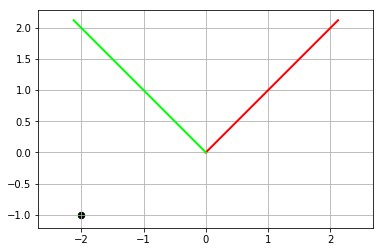

In [4]:
u1 = normalise(vec(1., 1.))
u2 = normalise(vec(-1., 1.))

A = np.hstack((u1, u2))
P = np.dot(A, np.transpose(A))

x = vec(-2., -1.)
x_proj = proj(P, x)
x_proj2 = proj_basis(A, x)

print('A: \n{}'.format(np.round(A, 2)))
print('P: \n{}'.format(np.round(P, 2)))
print('proj:   {}'.format(np.round(x_proj.flatten(), 2)))
print('proj_b: {}'.format(np.round(x_proj2, 2)))

plt.figure()
ax = plt.gca()
draw_vector(ax, u1, vec(0, 0), [1, 0, 0, 1])
draw_vector(ax, u2, vec(0, 0), [0, 1, 0, 1])
draw_point(ax, x_proj, [0, 1, 0])
draw_point(ax, x, [0, 0, 0])
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.grid()
plt.axis('equal')
plt.show()

### Projection in general

Consider the equation $\mathbf{Ax} = \mathbf{b}$ in which:

   * $\mathbf{x} \in \mathbb{R}^n$
   * $\mathbf{b} \in \mathbb{R}^m$
   * $\mathbf{A} \in \mathbb{R}^{m \times n}$
    
How do we project vector $\mathbf{b}$ onto the closest point $\mathbf{p}$ in the plane defined by $\mathbf{A}$.

In the case of a plane in a 3 dimensional space

 * $\mathbf{p} \in \mathbb{R}^3$
 * $\mathbf{x} \in \mathbb{R}^2$
 * $\mathbf{b} \in \mathbb{R}^3$
 * $\mathbf{A} \in \mathbb{R}^{3 \times 2}$

The plane matrix $\mathbf{A}$ can be thought of in terms of its basis vectors: $ \mathbf{A} = [\mathbf{a}_1\,\, \mathbf{a}_2] $ where $\mathbf{a}_i \in \mathbb{R}^{3}$.

The point $\mathbf{p}$ will be a linear combination of these basis vectors:

$$ \mathbf{p} = x_1\,\mathbf{a}_1 + x_2\,\mathbf{a}_2 = \mathbf{Ax}$$
 
We essentialy have to find $\mathbf{x}$ which we can be used to then find $\mathbf{p}$. 

We know that the vector from the point $\mathbf{p}$ to its projection on the plane $\mathbf{Ax}$ is orthonormal to the plane. This ca be expressed as:

$$\mathbf{a}_i^T(\mathbf{b} - \mathbf{Ax}) = 0$$

in matrix format:


$$\mathbf{A}^T(\mathbf{b} - \mathbf{Ax}) = 0$$

Solving for $\mathbf{x}$:

1. $\mathbf{A}^T\mathbf{b} - \mathbf{A}^T\mathbf{Ax} = 0$
2. $\mathbf{A}^T\mathbf{Ax} = \mathbf{A}^T\mathbf{b}$
3. $\mathbf{x} = (\mathbf{A}^T\mathbf{A})^{-1}\mathbf{A}^T\mathbf{b}$

To get the point $\mathbb{p}$ we have to multiply the plane matrix A by the linear combination factors $\mathbf{x}$.

$$ \mathbf{p} = \mathbf{Ax} = \mathbf{A}(\mathbf{A}^T\mathbf{A})^{-1}\mathbf{A}^T\mathbf{b}$$ 

The projection matrix is:

$$ P = \mathbf{A}(\mathbf{A}^T\mathbf{A})^{-1}\mathbf{A}^T$$
$$ \mathbf{p} = P\;\mathbf{b}$$


In [27]:
a1 = vec(1., 0., 0.)
a2 = vec(0., 1., 0.)

A = matrix_from_basis_vectors(a1, a2)
b = vec(2., 2., 5.)

normaliser = np.dot(np.transpose(A), A)
P = np.dot(np.dot(A, normaliser), np.transpose(A))

p = np.dot(P, b)
x = np.dot(np.transpose(A), p)

print('projection matrix: \n{}'.format(np.round(P, 2)))
print('closest point p:   \n{}'.format(p))
print('closest point x:   \n{}'.format(x))



projection matrix: 
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]]
closest point p:   
[[2.]
 [2.]
 [0.]]
closest point x:   
[[2.]
 [2.]]
